In [76]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# fix the current import path
import sys, os
cwd = os.getcwd()
cdir = os.path.abspath(os.path.join(cwd,".."))
sys.path.insert(0, cdir)

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from temporalanalysis.temporal_analysis_ab import compute_avg_behavior, plot_avg_behavior, load_dataset, compute_phase_matrix, plot_phase_matrix, plot_avg_rssi,testbed_phase_matrix
from spatialreuse import compute_spatial_reuse
from linkestimator import best_rssi_sequence, compute_stability, best_single_configuration,traverse_and_stick

# setup matplotlib parameters
import matplotlib
matplotlib.matplotlib_fname()
matplotlib.rcParams['lines.linewidth'] = 1
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['legend.fontsize'] = 12

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
df = {}
best_rssi = {}
best_configs = {}
best_stability = {}
for node in range(16):
    print('node', node)
    fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_temporal/Ch11_Pwr7_MoteA/2016-10-05_NODE%d.csv'% node
    df[node] = load_dataset(fn)
    #best_rssi[node], best_configs[node] = best_rssi_sequence(df[node])
    #best_stability[node] = compute_stability(best_configs[node])

node 0
node 1


KeyboardInterrupt: 

(-80, -100)

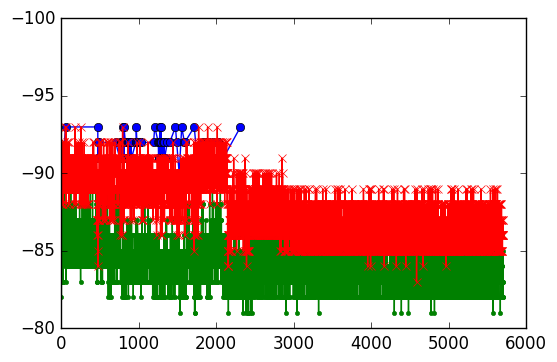

In [80]:
df0 = df[0]
p0_0 = df0[(df0.phase1 == 0) & (df0.phase2 == 0)]
p32_0 = df0[(df0.phase1 == 0) & (df0.phase2 == 128)]
p0_192 = df0[(df0.phase1 == 0) & (df0.phase2 == 192)]
plt.plot(p0_0['round'], p0_0.rssi, 'o-')
plt.plot(p32_0['round'], p32_0.rssi, '.-')
plt.plot(p0_192['round'], p0_192.rssi, 'x-')
plt.ylim(-80, -100)

{'boxes': [<matplotlib.lines.Line2D at 0x1153891d0>,
 'caps': [<matplotlib.lines.Line2D at 0x115391c18>,
 'fliers': [<matplotlib.lines.Line2D at 0x115398e10>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1153985f8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x115389ba8>,
  <matplotlib.lines.Line2D at 0x115434be0>]}

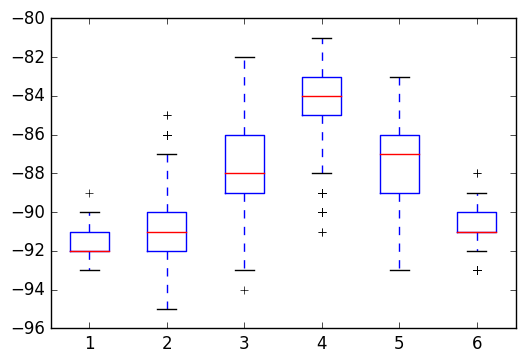

In [122]:
phases = [(0, 0), (0, 32), (0, 64), (0, 128), (0, 192), (0, 224)]
data = []
for phase in phases:
    s = df0[(df0.phase1 == phase[0]) & (df0.phase2 == phase[1])]
    data.append(s.rssi.values)

plt.boxplot(data)

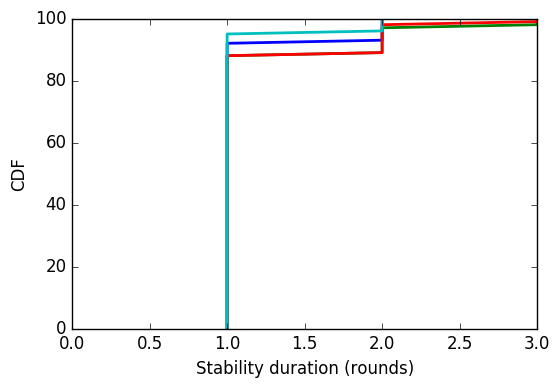

In [32]:
stability = {}
for node in np.arange(0,16, 4):
    x = np.percentile(best_stability[node], np.arange(100))
    plt.plot(x,np.arange(100))
plt.xlim(0, 3)
plt.xlabel('Stability duration (rounds)')
plt.ylabel('CDF')
plt.savefig('figures/stabilty.pdf')

In [52]:
sb_rssi_val = {}
sb_lqi_val = {}

ts_lqi_val = {}
ts_rssi_val = {}
for node in range(16):
    print('node', node)
    vals, configs, drops = best_single_configuration(df[node])    
    sb_rssi_val[node] = np.mean(vals)
    
    vals, configs, drops = best_single_configuration(df[node], metric='lqi')
    sb_lqi_val[node] = np.mean(vals)

    vals, configs, drops = traverse_and_stick(df[node], metric='rssi')
    ts_rssi_val[node] = np.mean(vals)
    
    vals, configs, drops = traverse_and_stick(df[node], metric='lqi')
    ts_lqi_val[node] = np.mean(vals)


node 0
node 1
node 2
node 3
node 4
node 5
node 6
node 7
node 8
node 9
node 10
node 11
node 12
node 13
node 14
node 15


In [55]:
ysb_rssi_val = [sb_rssi_val[n] for n in range(16)]
ysb_rssi_lqi = [sb_lqi_val[n] for n in range(16)]
yts_rssi_val = [ts_rssi_val[n] for n in range(16)]
yts_lqi_val = [ts_lqi_val[n] for n in range(16)]
xs = np.arange(16)

<Container object of 16 artists>

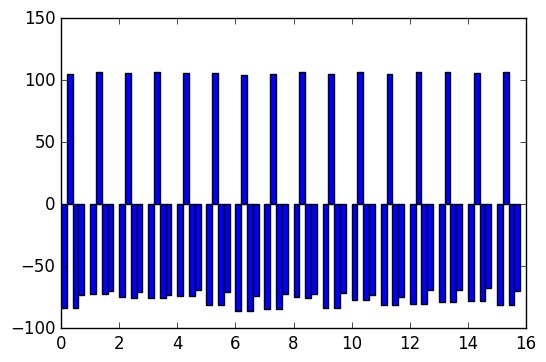

In [56]:
plt.bar(xs, ysb_rssi_val, .2)
plt.bar(xs+.2, ysb_rssi_lqi, .2)
plt.bar(xs+.4, yts_rssi_val, .2)
plt.bar(xs+.6, yts_lqi_val, .2)

In [160]:
a = pd.DataFrame.from_csv('lqe.csv')
best_rssi = a[a.algo == 'best-rssi-seq']
single_rssi = a[a.algo == 'single-rssi-seq']
fs_rssi = a[a.algo == 'fs-rssi']
fs_lqi = a[a.algo == 'fs-lqi']


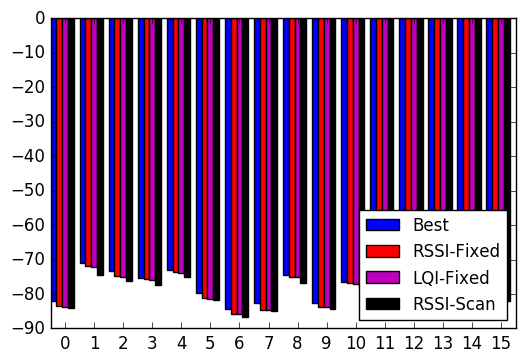

In [167]:
plt.bar(best_rssi.node, best_rssi.rssi, .2)
plt.bar(single_rssi.node + .2, single_rssi.rssi, .2, color='r')
plt.bar(fs_rssi.node + .4, fs_rssi.rssi, .2, color='m')
plt.bar(fs_lqi.node + .6, fs_lqi.rssi, .2, color='k')
plt.legend(['Best', 'RSSI-Fixed', 'LQI-Fixed', 'RSSI-Scan', 'LQI-Scan'], loc='lower right')
plt.xticks(np.arange(16) + .5, np.arange(16))
plt.savefig('figures/links/lqe_rssi.pdf')

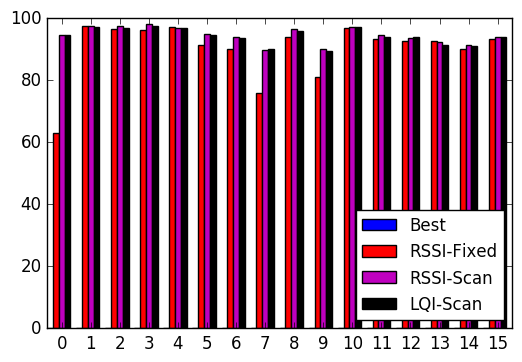

In [168]:
plt.bar(best_rssi.node, best_rssi.drops, .2)
plt.bar(single_rssi.node + .2, 100 - single_rssi.drops / 5702 * 100, .2, color='r')
plt.bar(fs_rssi.node + .4, 100 - fs_rssi.drops / 5702 * 100, .2, color='m')
plt.bar(fs_lqi.node + .6, 100 - fs_lqi.drops / 5702 * 100, .2, color='k')
plt.legend(['Best', 'RSSI-Fixed',  'RSSI-Scan', 'LQI-Scan'], loc='lower right')
plt.ylim(0, 100)
plt.xlim(0,16)
plt.xticks(np.arange(16) + .5, np.arange(16))
plt.savefig('figures/links/lqe_prr.pdf')


In [165]:
100 - single_rssi.drops / 5702 * 100

seq
1     62.995440
6     97.404420
11    96.597685
16    96.317082
21    97.123816
26    91.441599
31    90.301649
36    75.903192
41    94.037180
46    81.006664
51    96.913364
56    93.440898
61    92.792003
66    92.634163
71    90.161347
76    93.423360
Name: drops, dtype: float64